# Quick exploration of the data

More data exploration will occur in the training notebook

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = (16,8) # define default figure size

## Display final data distribution

In [2]:
def count_files(path):
    '''Returns the number of files found in a directory'''
    count = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
    return count

In [3]:
data_dir = '../data/gsp15_ttv' # define data folder

**Get class names**

In [4]:
classes = os.listdir(f'{data_dir}/train/') 
spacer = lambda x: x.replace('_', ' ') # define spacer function
classes_spaced = list(map(spacer, classes)) # apply to replace _ with a space
classes_spaced

['Pothos',
 'Spider Plant',
 'Peace Lily',
 'Umbrella Tree',
 'Asparagus Fern',
 'Snake Plant',
 'Aloe Vera',
 'Boston Fern',
 'Jade Plant',
 'Fiddle Leaf Fig',
 'Easter Lily',
 'Rubber Plant',
 'Parlor Palm',
 'Baby Rubber Plant',
 'Monstera']

**Count class images**

In [5]:
class_counts = []

for class_name in classes:
    class_path = f'{data_dir}/train/{class_name}'
    class_counts.append(count_files(class_path))

**Plot number of final images per class**

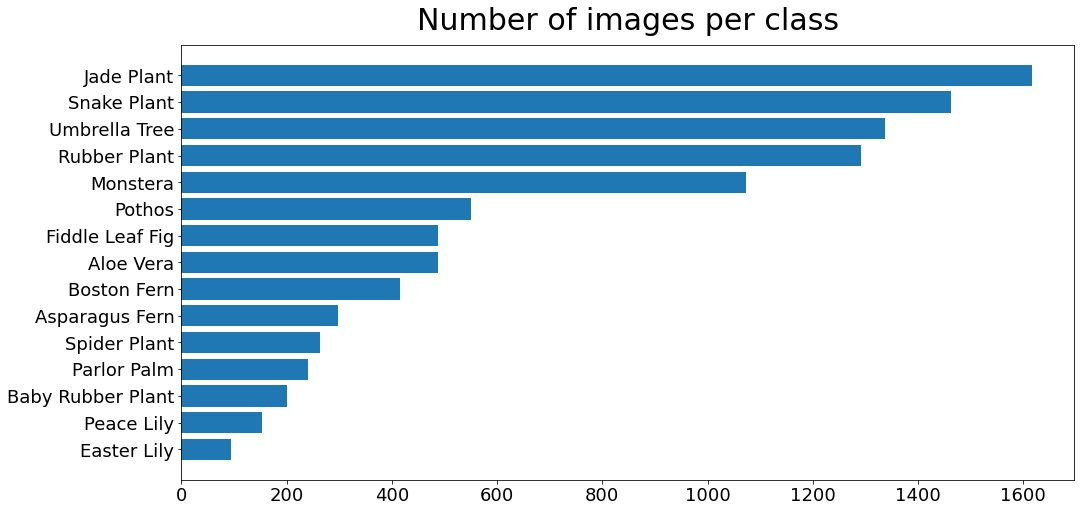

In [6]:
fig, ax = plt.subplots()

class_counts, classes_spaced = zip(*sorted(zip(class_counts, classes_spaced)))

ax.barh(classes_spaced, class_counts)
ax.set_title('Number of images per class', size=30, pad=15)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('../data/figures/number_imgs_per_class.png', dpi = 350)

**Note on imbalanced data**

The dataset is clearly unbalanced, largely due to uneven availability, predominantly in the Pl@ntNet dataset, which accounts for the majority of the data.     
     
This is dealt with in the modeling step by generating weights to apply to the loss function, unltimately ensuring every class has equal total value in the loss function for training.